## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.109270 -1.421851 -0.470029 -0.490905  1.620630 -0.846862
1  1.578049  0.855088  1.444869 -1.703763  0.951630  0.334305
2 -0.814514  1.743632 -0.582736 -0.391750  1.042955  0.436043
3 -0.275321 -0.607637 -1.068272 -0.851492  0.129019 -0.584504
4  1.567394 -1.106503  0.749374 -0.868066  0.776176 -0.620298


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9884498	total: 58.1ms	remaining: 58.1s
1:	learn: 0.9799256	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9699239	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9597906	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9488003	total: 60.2ms	remaining: 12s
5:	learn: 0.9394222	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9272760	total: 61.3ms	remaining: 8.69s
7:	learn: 0.9163683	total: 61.8ms	remaining: 7.67s
8:	learn: 0.9074500	total: 62.4ms	remaining: 6.87s
9:	learn: 0.8984065	total: 63ms	remaining: 6.24s
10:	learn: 0.8896287	total: 63.6ms	remaining: 5.72s
11:	learn: 0.8789830	total: 64.2ms	remaining: 5.29s
12:	learn: 0.8697853	total: 64.7ms	remaining: 4.91s
13:	learn: 0.8614680	total: 65.2ms	remaining: 4.59s
14:	learn: 0.8533520	total: 65.7ms	remaining: 4.32s
15:	learn: 0.8453283	total: 66.1ms	remaining: 4.07s
16:	learn: 0.8368611	total: 66.6ms	remaining: 3.85s
17:	learn: 0.8291222	total: 67.1ms	remaining: 3.66s
18:	learn: 0.8237313	total: 67.7ms	remaining: 3.

98:	learn: 0.4093632	total: 108ms	remaining: 984ms
99:	learn: 0.4060462	total: 109ms	remaining: 977ms
100:	learn: 0.4030653	total: 109ms	remaining: 970ms
101:	learn: 0.3994909	total: 109ms	remaining: 964ms
102:	learn: 0.3968662	total: 110ms	remaining: 956ms
103:	learn: 0.3937844	total: 110ms	remaining: 950ms
104:	learn: 0.3911192	total: 111ms	remaining: 942ms
105:	learn: 0.3883757	total: 111ms	remaining: 936ms
106:	learn: 0.3855206	total: 111ms	remaining: 929ms
107:	learn: 0.3828971	total: 112ms	remaining: 923ms
108:	learn: 0.3805931	total: 112ms	remaining: 917ms
109:	learn: 0.3778812	total: 113ms	remaining: 911ms
110:	learn: 0.3749328	total: 113ms	remaining: 907ms
111:	learn: 0.3722699	total: 114ms	remaining: 902ms
112:	learn: 0.3693149	total: 114ms	remaining: 897ms
113:	learn: 0.3665663	total: 115ms	remaining: 892ms
114:	learn: 0.3636015	total: 115ms	remaining: 887ms
115:	learn: 0.3611143	total: 116ms	remaining: 881ms
116:	learn: 0.3577930	total: 116ms	remaining: 875ms
117:	learn: 0.

233:	learn: 0.1620840	total: 187ms	remaining: 611ms
234:	learn: 0.1607899	total: 187ms	remaining: 610ms
235:	learn: 0.1597426	total: 188ms	remaining: 608ms
236:	learn: 0.1588753	total: 188ms	remaining: 605ms
237:	learn: 0.1582135	total: 189ms	remaining: 604ms
238:	learn: 0.1574451	total: 189ms	remaining: 601ms
239:	learn: 0.1562876	total: 189ms	remaining: 599ms
240:	learn: 0.1557256	total: 189ms	remaining: 597ms
241:	learn: 0.1546126	total: 190ms	remaining: 595ms
242:	learn: 0.1543492	total: 190ms	remaining: 593ms
243:	learn: 0.1534100	total: 191ms	remaining: 591ms
244:	learn: 0.1524714	total: 191ms	remaining: 590ms
245:	learn: 0.1519335	total: 192ms	remaining: 588ms
246:	learn: 0.1514812	total: 192ms	remaining: 586ms
247:	learn: 0.1504581	total: 193ms	remaining: 584ms
248:	learn: 0.1492076	total: 193ms	remaining: 583ms
249:	learn: 0.1482028	total: 194ms	remaining: 582ms
250:	learn: 0.1472707	total: 194ms	remaining: 580ms
251:	learn: 0.1470698	total: 195ms	remaining: 578ms
252:	learn: 

446:	learn: 0.0545007	total: 291ms	remaining: 359ms
447:	learn: 0.0542962	total: 291ms	remaining: 359ms
448:	learn: 0.0540961	total: 292ms	remaining: 358ms
449:	learn: 0.0538229	total: 292ms	remaining: 357ms
450:	learn: 0.0535773	total: 293ms	remaining: 356ms
451:	learn: 0.0533466	total: 293ms	remaining: 356ms
452:	learn: 0.0531088	total: 294ms	remaining: 355ms
453:	learn: 0.0528708	total: 294ms	remaining: 354ms
454:	learn: 0.0525552	total: 295ms	remaining: 353ms
455:	learn: 0.0523264	total: 295ms	remaining: 352ms
456:	learn: 0.0520950	total: 295ms	remaining: 351ms
457:	learn: 0.0518722	total: 296ms	remaining: 350ms
458:	learn: 0.0515688	total: 296ms	remaining: 349ms
459:	learn: 0.0513529	total: 297ms	remaining: 349ms
460:	learn: 0.0510584	total: 298ms	remaining: 348ms
461:	learn: 0.0510008	total: 298ms	remaining: 347ms
462:	learn: 0.0507324	total: 298ms	remaining: 346ms
463:	learn: 0.0504703	total: 299ms	remaining: 345ms
464:	learn: 0.0502301	total: 299ms	remaining: 344ms
465:	learn: 

614:	learn: 0.0278689	total: 370ms	remaining: 232ms
615:	learn: 0.0276967	total: 371ms	remaining: 231ms
616:	learn: 0.0275275	total: 371ms	remaining: 230ms
617:	learn: 0.0273578	total: 372ms	remaining: 230ms
618:	learn: 0.0272253	total: 373ms	remaining: 229ms
619:	learn: 0.0271355	total: 373ms	remaining: 229ms
620:	learn: 0.0269726	total: 374ms	remaining: 228ms
621:	learn: 0.0268088	total: 374ms	remaining: 227ms
622:	learn: 0.0267223	total: 375ms	remaining: 227ms
623:	learn: 0.0265566	total: 375ms	remaining: 226ms
624:	learn: 0.0264740	total: 376ms	remaining: 225ms
625:	learn: 0.0263114	total: 376ms	remaining: 225ms
626:	learn: 0.0262292	total: 377ms	remaining: 224ms
627:	learn: 0.0260742	total: 377ms	remaining: 223ms
628:	learn: 0.0259955	total: 378ms	remaining: 223ms
629:	learn: 0.0258387	total: 378ms	remaining: 222ms
630:	learn: 0.0257607	total: 378ms	remaining: 221ms
631:	learn: 0.0256191	total: 379ms	remaining: 221ms
632:	learn: 0.0255609	total: 379ms	remaining: 220ms
633:	learn: 

824:	learn: 0.0121525	total: 473ms	remaining: 100ms
825:	learn: 0.0121147	total: 474ms	remaining: 99.9ms
826:	learn: 0.0120546	total: 475ms	remaining: 99.3ms
827:	learn: 0.0120040	total: 475ms	remaining: 98.7ms
828:	learn: 0.0119764	total: 476ms	remaining: 98.1ms
829:	learn: 0.0119131	total: 476ms	remaining: 97.5ms
830:	learn: 0.0118838	total: 477ms	remaining: 97ms
831:	learn: 0.0118315	total: 477ms	remaining: 96.4ms
832:	learn: 0.0118048	total: 478ms	remaining: 95.8ms
833:	learn: 0.0117536	total: 478ms	remaining: 95.2ms
834:	learn: 0.0117067	total: 479ms	remaining: 94.6ms
835:	learn: 0.0116805	total: 479ms	remaining: 94ms
836:	learn: 0.0116522	total: 480ms	remaining: 93.4ms
837:	learn: 0.0116060	total: 480ms	remaining: 92.8ms
838:	learn: 0.0115505	total: 480ms	remaining: 92.2ms
839:	learn: 0.0115051	total: 481ms	remaining: 91.6ms
840:	learn: 0.0114707	total: 481ms	remaining: 91ms
841:	learn: 0.0114454	total: 482ms	remaining: 90.4ms
842:	learn: 0.0114007	total: 482ms	remaining: 89.8ms


984:	learn: 0.0070831	total: 553ms	remaining: 8.41ms
985:	learn: 0.0070498	total: 553ms	remaining: 7.86ms
986:	learn: 0.0070116	total: 554ms	remaining: 7.29ms
987:	learn: 0.0069989	total: 554ms	remaining: 6.73ms
988:	learn: 0.0069703	total: 555ms	remaining: 6.17ms
989:	learn: 0.0069331	total: 555ms	remaining: 5.61ms
990:	learn: 0.0068992	total: 556ms	remaining: 5.04ms
991:	learn: 0.0068816	total: 556ms	remaining: 4.48ms
992:	learn: 0.0068538	total: 556ms	remaining: 3.92ms
993:	learn: 0.0068415	total: 557ms	remaining: 3.36ms
994:	learn: 0.0068055	total: 557ms	remaining: 2.8ms
995:	learn: 0.0067885	total: 558ms	remaining: 2.24ms
996:	learn: 0.0067531	total: 558ms	remaining: 1.68ms
997:	learn: 0.0067365	total: 559ms	remaining: 1.12ms
998:	learn: 0.0067018	total: 559ms	remaining: 559us
999:	learn: 0.0066855	total: 560ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

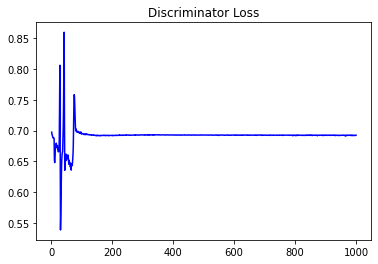

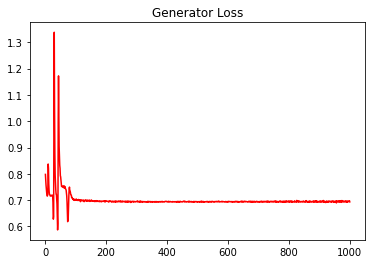

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03561867727659384


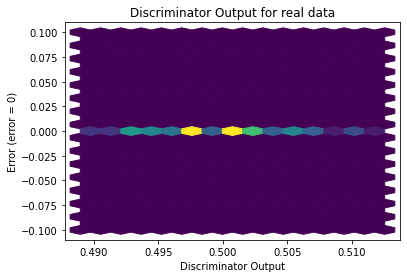

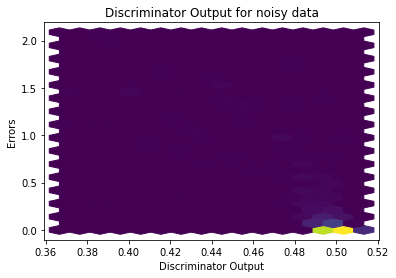

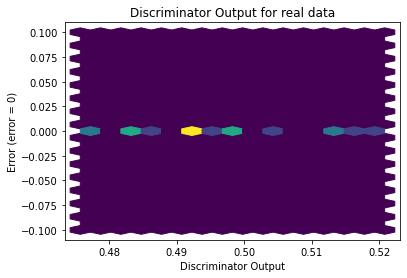

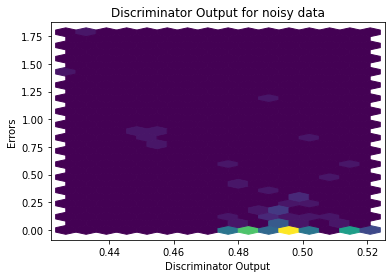

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


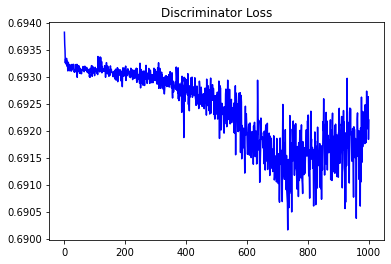

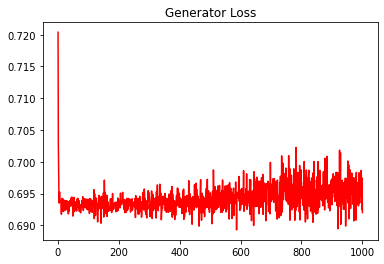

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.055659847978691


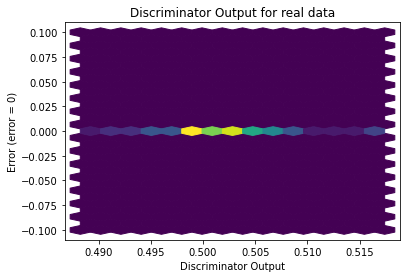

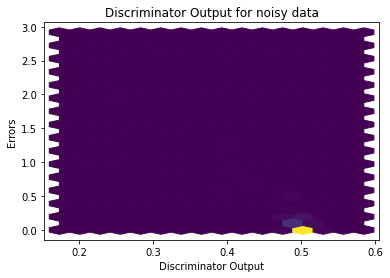

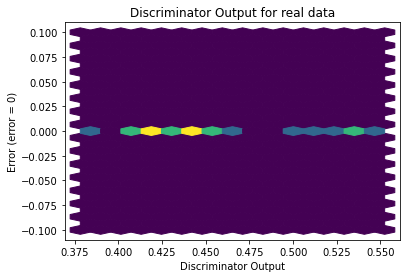

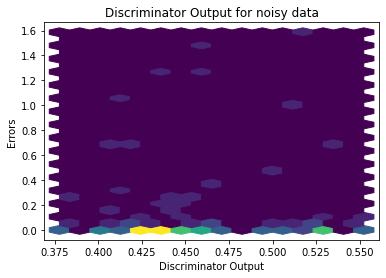

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1711]], requires_grad=True)
